In [ ]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Opinion Mining for Genetically Enginnered Food/df.csv')

In [ ]:
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2020-07-30 20:39:37+00:00,1.288940e+18,"In this week's @Riverford newsletter, wise wo...",FinolaBrady
1,1,2020-07-30 16:48:49+00:00,1.288880e+18,@RustyMark4 @richandbeck71 @BirdGuides There r...,SarahBalfour9
2,2,2020-07-30 16:44:55+00:00,1.288880e+18,@richandbeck71 @BirdGuides No eu control over ...,RustyMark4
3,3,2020-07-30 16:44:33+00:00,1.288880e+18,@RobertWager1 @ekogaia @PeasantsLeague @KHeffe...,stuartsmyth66
4,4,2020-07-30 16:30:11+00:00,1.288870e+18,@FoodSovereignGH @ekogaia @Resourceful1942 @EA...,stuartsmyth66


# Data Preprocessing

In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (10001, 5)
Columns are: Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')


In [ ]:
# use the drop columns function to streamline the dataset
df = df.drop(columns=['Unnamed: 0','Tweet Id','Username'])
df.head(10)

,Datetime,Text
0,2020-07-30 20:39:37+00:00,"In this week's @Riverford newsletter, wise wo..."
1,2020-07-30 16:48:49+00:00,@RustyMark4 @richandbeck71 @BirdGuides There r...
2,2020-07-30 16:44:55+00:00,@richandbeck71 @BirdGuides No eu control over ...
3,2020-07-30 16:44:33+00:00,@RobertWager1 @ekogaia @PeasantsLeague @KHeffe...
4,2020-07-30 16:30:11+00:00,@FoodSovereignGH @ekogaia @Resourceful1942 @EA...
5,2020-07-30 15:36:41+00:00,@athimoolamias @AusCottonSci may I ask what da...
6,2020-07-30 15:20:16+00:00,"#New #2019 #Conference - Just Released, #au..."
7,2020-07-30 15:18:45+00:00,For actual data on the prodigious economic and...
8,2020-07-30 15:08:42+00:00,@AgBioWorld We’re working on integrating this ...
9,2020-07-30 14:58:17+00:00,@prometheusgreen @AusCottonSci I have studied ...


In [ ]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

Dataset size: (10001, 2)
Columns are: Index(['Datetime', 'Text'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  10001 non-null  object
 1   Text      10001 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [ ]:
#convert data to datetime and strings for manipulation.
df["Text"]= df["Text"].astype(str)
df['Datetime']= pd.to_datetime(df['Datetime'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  10001 non-null  datetime64[ns, UTC]
 1   Text      10001 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 156.4+ KB


Data Cleaning

> Removing Twitter Handles (@user)

> Removing Punctuations,Links, Numbers, and Special Characters

> Tokenization

> Stemming: It is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
MIN_YEAR = 1900
MAX_YEAR = 2100
def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')

In [ ]:
def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern


In [ ]:
def get_hashtags_pattern():
    return re.compile(r'#\w*')

In [ ]:
def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')

In [ ]:
def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')

In [ ]:
def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')

In [ ]:
def get_mentions_pattern():
    return re.compile(r'@\w*')

In [ ]:
def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False

In [ ]:

class TwitterPreprocessor:

    def __init__(self, text: str):
        self.text = text

    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()

    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self

    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self

    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self

    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self

    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self

    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self

    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self

    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))

        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self

    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self

    def lowercase(self):
        self.text = self.text.lower()
        return self

In [ ]:
# Clean tweets and append to new column
tweets = df['Text']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)

In [ ]:
df['clean_tweets'] = clean_tweets 
df.head(5)

,Datetime,Text,clean_tweets
0,2020-07-30 20:39:37+00:00,"In this week's @Riverford newsletter, wise wo...",In weeks newsletter wise words GM crops Guy
1,2020-07-30 16:48:49+00:00,@RustyMark4 @richandbeck71 @BirdGuides There r...,There really nothing wrong GM wish people woul...
2,2020-07-30 16:44:55+00:00,@richandbeck71 @BirdGuides No eu control over ...,No eu control GM crops soon
3,2020-07-30 16:44:33+00:00,@RobertWager1 @ekogaia @PeasantsLeague @KHeffe...,When higher yields GM crops factored estimated...
4,2020-07-30 16:30:11+00:00,@FoodSovereignGH @ekogaia @Resourceful1942 @EA...,Founately GM crops increase yields reduce chem...


In [ ]:
df.to_csv("/content/drive/MyDrive/Opinion Mining for Genetically Enginnered Food/Cleaned_data.csv",index=False)

# Visualization

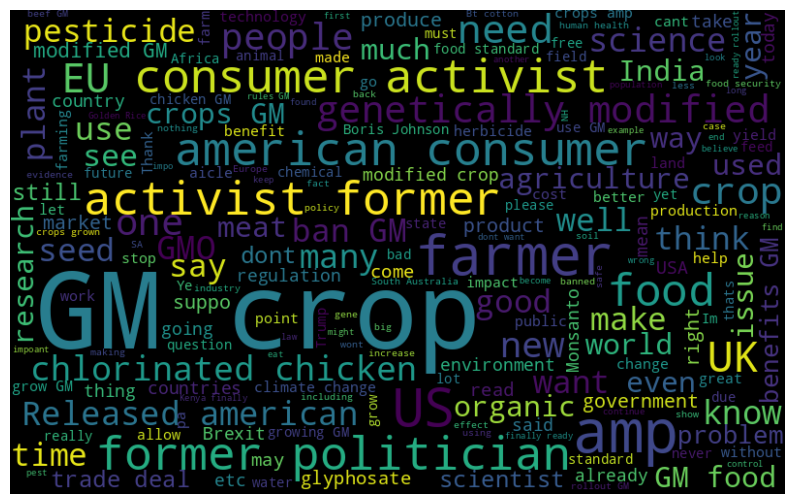

In [ ]:
all_words = ' '.join([text for text in df['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Sentiment Analysis Using VADER

In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

(array([ 100.,  288.,  301.,  346.,  504.,  478.,  315.,  372.,  223.,
         283., 2449.,  316.,  397.,  622.,  785.,  451.,  618.,  475.,
         459.,  219.]),
 array([-0.9801 , -0.88288, -0.78566, -0.68844, -0.59122, -0.494  ,
        -0.39678, -0.29956, -0.20234, -0.10512, -0.0079 ,  0.08932,
         0.18654,  0.28376,  0.38098,  0.4782 ,  0.57542,  0.67264,
         0.76986,  0.86708,  0.9643 ]),
 <BarContainer object of 20 artists>)

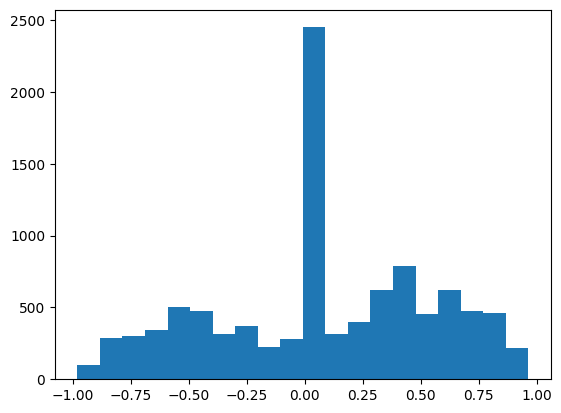

In [ ]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()

# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

VADER gives back 4 types of polarity scores for every call: Positive, negative, neutral or compound.

In our code, we only consider the compound score which is a combination of the other three plus some additional rules and a normalization between -1 and 1.

One thing to notice from our histogram is that many tweets have a neutral score, and there are only slightly more positive ones in this sample.


In [ ]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

<ipython-input-25-82b9ec5e1daa>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df,sentiment.apply(pd.Series)],1)


,Datetime,Text,clean_tweets,neg,neu,pos,compound
0,2020-07-30 20:39:37+00:00,"In this week's @Riverford newsletter, wise wo...",In weeks newsletter wise words GM crops Guy,0.000,0.693,0.307,0.4767
1,2020-07-30 16:48:49+00:00,@RustyMark4 @richandbeck71 @BirdGuides There r...,There really nothing wrong GM wish people woul...,0.214,0.709,0.077,-0.6156
2,2020-07-30 16:44:55+00:00,@richandbeck71 @BirdGuides No eu control over ...,No eu control GM crops soon,0.306,0.694,0.000,-0.2960
3,2020-07-30 16:44:33+00:00,@RobertWager1 @ekogaia @PeasantsLeague @KHeffe...,When higher yields GM crops factored estimated...,0.000,1.000,0.000,0.0000
4,2020-07-30 16:30:11+00:00,@FoodSovereignGH @ekogaia @Resourceful1942 @EA...,Founately GM crops increase yields reduce chem...,0.297,0.526,0.176,-0.6808


In [ ]:
df.to_csv("/content/drive/MyDrive/Opinion Mining for Genetically Enginnered Food/cleaned_data2.csv",index=False)

# **Analyzing Sentiment**

In [ ]:
df.describe()

,neg,neu,pos,compound
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,0.097181,0.771251,0.130964,0.070905
std,0.126889,0.167818,0.136626,0.470089
min,0.000000,0.000000,0.000000,-0.980100
25%,0.000000,0.652000,0.000000,-0.273200
50%,0.000000,0.766000,0.106000,0.000000
75%,0.173000,0.905000,0.221000,0.440400
max,1.000000,1.000000,1.000000,0.964300


In [ ]:
df.index = pd.to_datetime(df['Datetime'])
df = df.sort_index()
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1d').mean()

Let’s try to tackle things one at a time here. First let’s look at those tweets with a sentiment of 0. Seborn’s distplot is a quick way to see the distribution of sentiment scores across our tweets.

<ipython-input-29-9493455551b5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['compound'], bins=15, ax=ax)


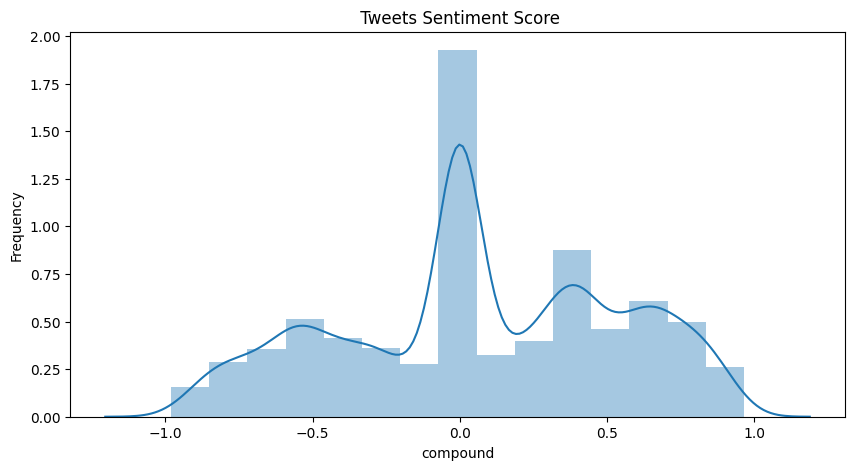

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title=' Tweets Sentiment Score', xlabel='Compund Sentiment Score', ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()

Overall our data is noisy, there is just too much of it. Taking a sample of our data might make it easier to see the trends happening.

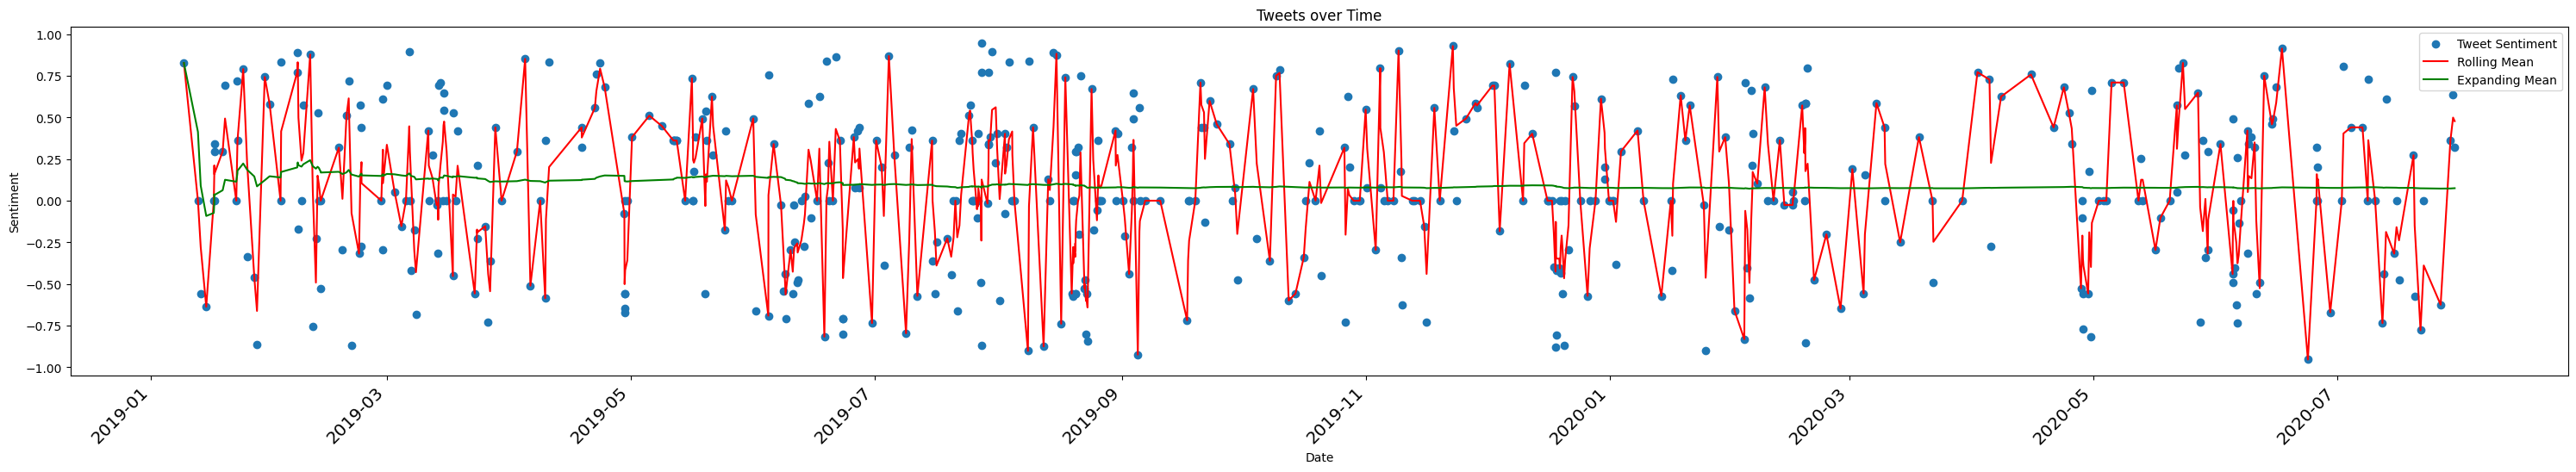

In [ ]:
ot = df.sample(frac=.05, random_state=1111)
ot.sort_index(inplace=True)

ot['mean'] = ot['compound'].expanding().mean()
ot['rolling'] = ot['compound'].rolling('1d').mean()

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)
ax.scatter(ot['Datetime'],ot['compound'], label='Tweet Sentiment')
ax.plot(ot['Datetime'],ot['rolling'], color ='r', label='Rolling Mean')
ax.plot(ot['Datetime'],ot['mean'], color='g', label='Expanding Mean')
ax.set(title='Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

#Topic Model Analysis


Topic Modeling (TM) consists of finding the information contained in textual documents (information retrieval in English) and presenting it in the form of themes (depending on the technique used, the relative importance of the themes can also be found ).


Latent Dirichlet Allocation (LDA) is one example of a topic model used to extract topics from a document. LDA is an unsupervised machine learning algorithm that allows a a set of textual observations to be explained by unobserved groups that explain similarities within the data. LDA represents documents as mixtures of topics that spit out words with certain probabilities.



In [ ]:
! pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
#!{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import numpy
import spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent) 
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

In [ ]:
# Convert to list
data = df.clean_tweets.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['china', 'approved', 'five', 'genetically', 'modified', 'gm', 'crops', 'impo', 'tuesday', 'first', 'months', 'move', 'could', 'boost', 'future', 'impos', 'ease', 'pressure', 'united', 'states', 'open', 'markets', 'farm', 'goods']]


**Build the Bigram, Trigram Models and Lemmatize**

Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences.

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for tweet in texts:
        doc = nlp(" ".join(tweet)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Tweet Data!

In [ ]:
data_ready[:5]

[['modify',
  'crop',
  'move',
  'boost',
  'future',
  'impo',
  'ease_pressure',
  'united_state'],
 ['modify',
  'crop',
  'move',
  'boost',
  'future',
  'impo',
  'ease_pressure',
  'united_state'],
 ['hand',
  'longawaite',
  'trade_talk',
  'modify',
  'crop',
  'move',
  'boost',
  'future',
  'impo'],
 ['hand',
  'longawaite',
  'trade_talk',
  'united_state',
  'world',
  'big',
  'producer',
  'impoer',
  'soybean',
  'canola',
  'global',
  'seed',
  'company',
  'long',
  'complain',
  'beijing'],
 ['scheme',
  'dependent',
  'seed',
  'amp',
  'crop',
  'offshoot',
  'lead',
  'direction']]

To build the LDA topic model using LdaModel(), we need the corpus and the dictionary.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

In [ ]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.108*"crop" + 0.038*"farmer" + 0.017*"benefit" + 0.017*"year" + 0.016*"plant" + 0.014*"reduce" + 0.013*"production" + 0.012*"help" + 0.012*"soil" + 0.012*"people"'), (1, '0.074*"crop" + 0.045*"food" + 0.020*"impact" + 0.019*"pesticide" + 0.013*"standard" + 0.010*"meat" + 0.010*"beef" + 0.010*"well" + 0.009*"much" + 0.009*"country"'), (2, '0.073*"crop" + 0.038*"grow" + 0.018*"week" + 0.015*"issue" + 0.015*"farm" + 0.014*"word" + 0.013*"high" + 0.009*"future" + 0.008*"wise" + 0.008*"vote"'), (3, '0.077*"crop" + 0.023*"seed" + 0.020*"amp" + 0.018*"ban" + 0.016*"guy" + 0.012*"politician" + 0.011*"government" + 0.010*"sure" + 0.008*"control" + 0.008*"create"')]


In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, we will know which document belongs predominantly to which topic.

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    tweet_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                tweet_topics_df = tweet_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    tweet_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    tweet_topics_df = pd.concat([tweet_topics_df, contents], axis=1)
    return(tweet_topics_df)

In [ ]:
df_topic_tweet_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)
# Format
df_dominant_topic = df_topic_tweet_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Tweet']
df_dominant_topic.head(10)

<ipython-input-48-635539369752>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweet_topics_df = tweet_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-48-635539369752>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweet_topics_df = tweet_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Tweet
0,0,2,0.7678,"crop, grow, week, issue, farm, word, high, fut...","[modify, crop, move, boost, future, impo, ease..."
1,1,2,0.7678,"crop, grow, week, issue, farm, word, high, fut...","[modify, crop, move, boost, future, impo, ease..."
2,2,2,0.6092,"crop, grow, week, issue, farm, word, high, fut...","[hand, longawaite, trade_talk, modify, crop, m..."
3,3,0,0.6807,"crop, farmer, benefit, year, plant, reduce, pr...","[hand, longawaite, trade_talk, united_state, w..."
4,4,3,0.5959,"crop, seed, amp, ban, guy, politician, governm...","[scheme, dependent, seed, amp, crop, offshoot,..."
5,5,3,0.6442,"crop, seed, amp, ban, guy, politician, governm...","[hand, longawaite, trade_talk, modify, crop]"
6,6,3,0.6443,"crop, seed, amp, ban, guy, politician, governm...","[hand, longawaite, trade_talk, modify, crop]"
7,7,2,0.4845,"crop, grow, week, issue, farm, word, high, fut...","[trade_talk, modify, crop, move, boost]"
8,8,2,0.6015,"crop, grow, week, issue, farm, word, high, fut...","[modify, crop, move, boost_overseas, grains_pu..."
9,9,3,0.8070,"crop, seed, amp, ban, guy, politician, governm...","[trade_talk, modify, crop]"


The most representative sentence for each topic
Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.



In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

tweet_topics_sorteddf_mallet = pd.DataFrame()
tweet_topics_outdf_grpd = df_topic_tweet_keywords.groupby('Dominant_Topic')

for i, grp in tweet_topics_outdf_grpd:
    tweet_topics_sorteddf_mallet = pd.concat([tweet_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
#Reset Index    
tweet_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
# Format
tweet_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Tweet"]
# Show
tweet_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Tweet
0,0,0.9578,"crop, farmer, benefit, year, plant, reduce, production, help, soil, people","[farmer, sell, crop, loss, sell, really, tired, win, people, lay, mid, continetl, nail, tired, w..."
1,1,0.9423,"crop, food, impact, pesticide, standard, meat, beef, well, much, country","[clash, cropsgovernment, tell, stop, fuck, food, safety, criminal, corrupt, careless, kick, fuss]"
2,2,0.9338,"crop, grow, week, issue, farm, word, high, future, wise, vote","[washed_chicken, crop, effect, happen, speech, suspend, agreement, sanction, happen, anyone, guess]"
3,3,0.9511,"crop, seed, amp, ban, guy, politician, government, sure, control, create","[omg, ghastly, evil, plan, cabal, allege, file, page, chargesheet, cyrusaparsa, scary, airobotic..."


Frequency Distribution of Word Counts in Tweets


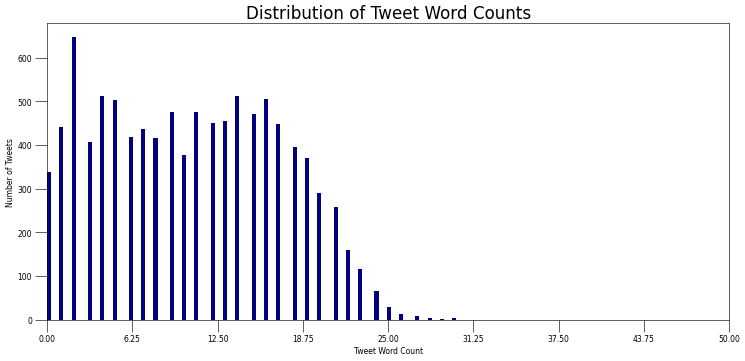

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Tweet]
# Plot
plt.figure(figsize=(16,7), dpi=55)
plt.hist(doc_lens, bins = 100, color='navy')
plt.gca().set(xlim=(0, 50), ylabel='Number of Tweets', xlabel='Tweet Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,50,9))
plt.title('Distribution of Tweet Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-52-9908640f2e8d>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-52-9908640f2e8d>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-52-9908640f2e8d>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-52-9908640f2e8d>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

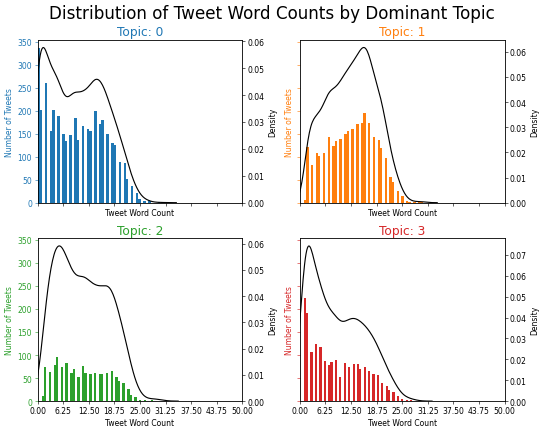

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

fig, axes = plt.subplots(2,2,figsize=(10,8), dpi=55, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Tweet]
    ax.hist(doc_lens, bins = 50, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 50), xlabel='Tweet Word Count')
    ax.set_ylabel('Number of Tweets', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))
    fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Tweet Word Counts by Dominant Topic', fontsize=22)
plt.show()


Though we’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics we’ve taken here is followed in the subsequent plots as well.



In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


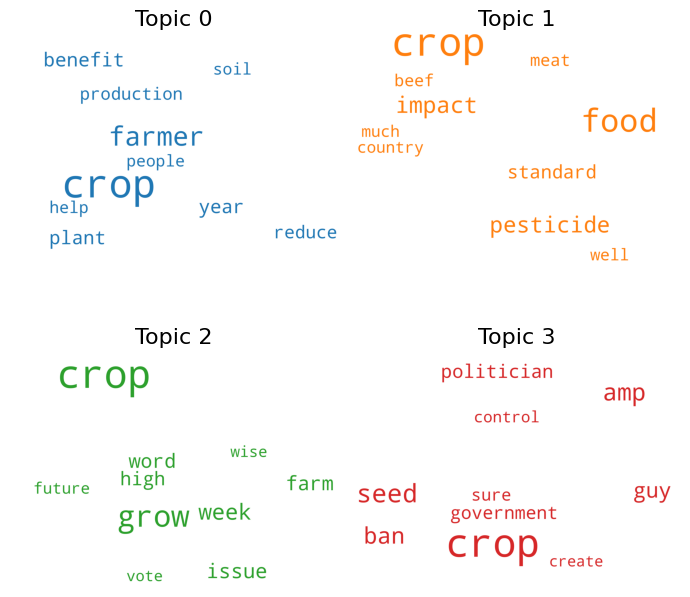

In [ ]:
topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Word Counts of Topic Keywords

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_topics = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


<ipython-input-57-82f69fc926e7>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_topics.loc[df_topics.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


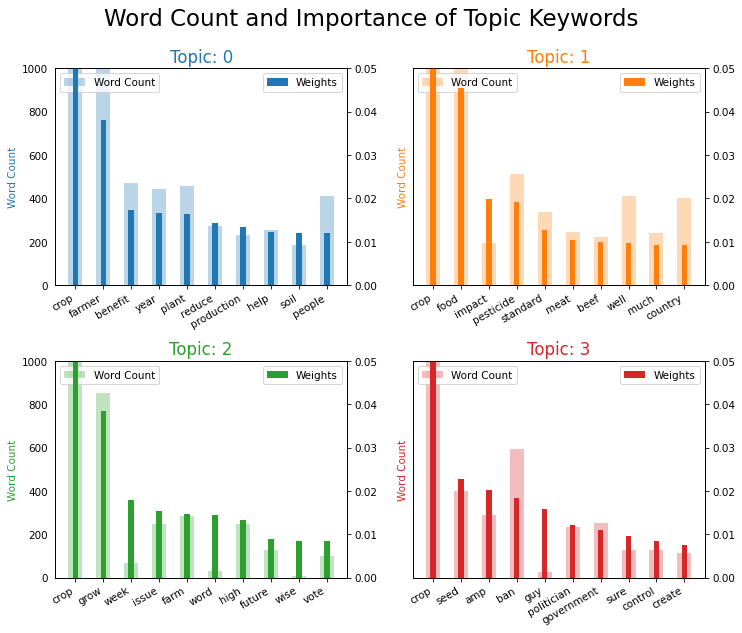

In [ ]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,8), sharey=True, dpi=75)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_topics.loc[df_topics.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_topics.loc[df_topics.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.050); ax.set_ylim(0, 1000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_topics.loc[df_topics.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

Sentence Chart Colored by Topic

Each word in the document is representative of one of the 4 topics. Let’s color each word in the given documents by the topic id it is attributed to. The color of the enclosing rectangle is the topic assigned to the document.

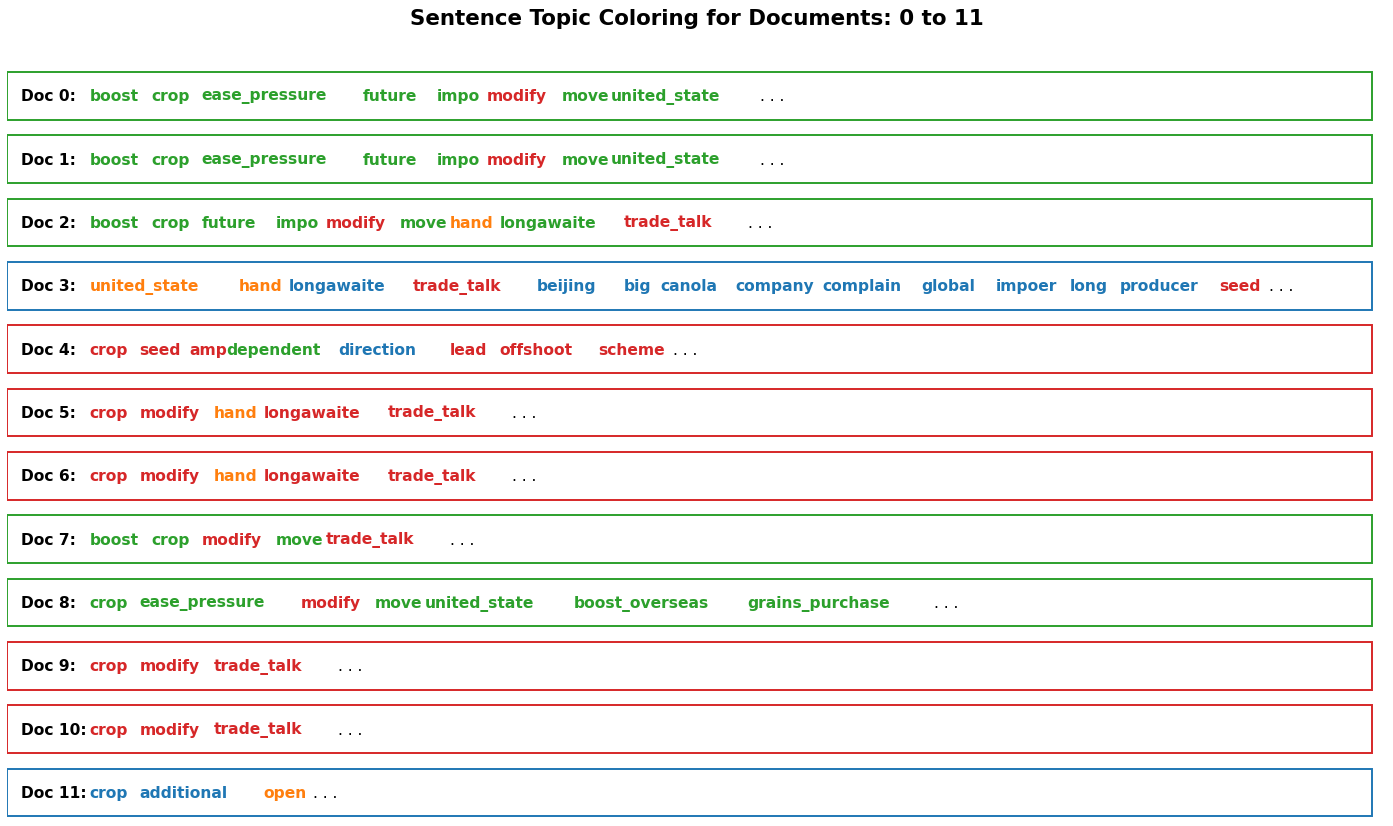

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=70)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)  
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()     


# **What are the most discussed topics in the documents?**

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

In [ ]:
dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

In [ ]:
# Distribution of Dominant Topics in Each Document
df_dominant = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df_dominant.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

In [ ]:
# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

In [ ]:
# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]


In [ ]:
df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

two plots:

1. The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
2.The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.


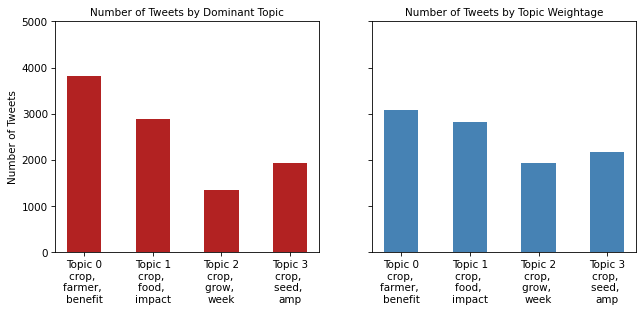

In [ ]:
from matplotlib.ticker import FuncFormatter
# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=75, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Tweets by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Tweets')
ax1.set_ylim(0, 5000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Tweets by Topic Weightage', fontdict=dict(size=10))

plt.show()

# **t-SNE Clustering Chart**

visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [ ]:
# Get topic weights
# n-1 rows each is a vector with i-1 posisitons, where n the number of documents
# i the topic number and tmp[i] = probability of topic i

topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

In [ ]:
# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

In [ ]:
# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

In [ ]:
# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

In [ ]:
# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8920 samples in 0.020s...
[t-SNE] Computed neighbors for 8920 samples in 0.483s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8920
[t-SNE] Computed conditional probabilities for sample 2000 / 8920
[t-SNE] Computed conditional probabilities for sample 3000 / 8920
[t-SNE] Computed conditional probabilities for sample 4000 / 8920
[t-SNE] Computed conditional probabilities for sample 5000 / 8920
[t-SNE] Computed conditional probabilities for sample 6000 / 8920
[t-SNE] Computed conditional probabilities for sample 7000 / 8920
[t-SNE] Computed conditional probabilities for sample 8000 / 8920
[t-SNE] Computed conditional probabilities for sample 8920 / 8920
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.689346
[t-SNE] KL divergence after 1000 iterations: 0.923268


In [ ]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

# **pyLDAVis**
pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for LdaModel().



In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 23.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.163322  0.241506       1        1  30.498984
1      0.288192  0.066720       2        1  30.430024
3     -0.046347 -0.123929       3        1  19.797369
2     -0.078522 -0.184297       4        1  19.273623, topic_info=            Term         Freq        Total Category  logprob  loglift
64          food  1460.000000  1460.000000  Default  30.0000  30.0000
232       farmer  1230.000000  1230.000000  Default  29.0000  29.0000
371         grow   783.000000   783.000000  Default  28.0000  28.0000
20          seed   477.000000   477.000000  Default  27.0000  27.0000
256       impact   643.000000   643.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1206      damage   131.867915   132.958088   Topic4  -5.0394   1.6382
70       promote   139.464771   141.575395   Topic4  -4.9834   1.6314
1692        wise   172.446917   242.088279   Topic4  -4.7711   1.3072
1           crop  1493.386974  8962.226942   Topic4  -2.6124  -0.1455
6977  newsletter   169.445216   240.843408   Topic4  -4.7886   1.2948

[168 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
684       4  0.989788         able
461       2  0.992796     actually
1789      1  0.008958         agri
1789      3  0.985381         agri
248       1  0.995478  agriculture
...     ...       ...          ...
704       1  0.995260         work
22        1  0.994951        world
2307      4  0.996798        worry
104       1  0.997866         year
530       1  0.998374        yield

[153 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])